Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Cabin,Embarked,Fare,Pclass,Ticket,Age,Name,Parch,Sex,SibSp,Survived
0,0,NaN,S,7.2500,3,A/5 21171,22.0,"Braund, Mr. Owen Harris",0,male,1,0.0
1,1,C85,C,71.2833,1,PC 17599,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,female,1,1.0
2,2,NaN,S,7.9250,3,STON/O2. 3101282,26.0,"Heikkinen, Miss. Laina",0,female,0,1.0
3,3,C123,S,53.1000,1,113803,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,female,1,1.0
4,4,NaN,S,8.0500,3,373450,35.0,"Allen, Mr. William Henry",0,male,0,0.0


#### Data Preprocessing

**Double Click on this to properly format it** <br>
Looking at the description for the data, we can see that we have the following
fields available:
• survival: This tells us whether a given person survived (0 = No, 1 = Yes).
• pclass: This is a proxy for socio-economic status, where first class is upper, 
second class is middle, and third class is lower status.
• sex: This tells us whether a given person is male or female.
• age: This is a fractional value if less than 1; for example, 0.25 is 3 months. If the age 
is estimated, it is in the form of xx.5.
• sibsp: A sibling is defined as a brother, sister, stepbrother, or stepsister, and a 
spouse is a husband or wife.
• parch: A parent is a mother or father, while a child is a daughter, son, 
stepdaughter, or stepson. Children that traveled only with a nanny did not travel
with a parent. Thus, 0 was assigned for this field.
• ticket: This gives the person's ticket number.
• fare: This is the passenger's fare.
• cabin: This tells us the passenger's cabin number.
• embarked: The point of embarkation is the location where the passenger boarded 
the ship.

In [3]:
data.describe()

,Unnamed: 0,Fare,Pclass,Age,Parch,SibSp,Survived
count,1309.000000,1308.000000,1309.000000,1046.000000,1309.000000,1309.000000,891.000000
mean,654.000000,33.295479,2.294882,29.881138,0.385027,0.498854,0.383838
std,378.020061,51.758668,0.837836,14.413493,0.865560,1.041658,0.486592
min,0.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,327.000000,7.895800,2.000000,21.000000,0.000000,0.000000,0.000000
50%,654.000000,14.454200,3.000000,28.000000,0.000000,0.000000,0.000000
75%,981.000000,31.275000,3.000000,39.000000,0.000000,1.000000,1.000000
max,1308.000000,512.329200,3.000000,80.000000,9.000000,8.000000,1.000000


In [4]:
data.describe(include='object')

,Cabin,Embarked,Ticket,Name,Sex
count,295,1307,1309,1309,1309
unique,186,3,929,1307,2
top,C23 C25 C27,S,CA. 2343,"Connolly, Miss. Kate",male
freq,6,914,11,2,843


In [5]:
data[data['Name'] == 'Kelly, Mr. James']

,Unnamed: 0,Cabin,Embarked,Fare,Pclass,Ticket,Age,Name,Parch,Sex,SibSp,Survived
696,696,NaN,S,8.0500,3,363592,44.0,"Kelly, Mr. James",0,male,0,0.0
891,891,NaN,Q,7.8292,3,330911,34.5,"Kelly, Mr. James",0,male,0,NaN


In [5]:
data.dtypes

Unnamed: 0      int64
Cabin          object
Embarked       object
Fare          float64
Pclass          int64
Ticket         object
Age           float64
Name           object
Parch           int64
Sex            object
SibSp           int64
Survived      float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   Cabin       295 non-null    object 
 2   Embarked    1307 non-null   object 
 3   Fare        1308 non-null   float64
 4   Pclass      1309 non-null   int64  
 5   Ticket      1309 non-null   object 
 6   Age         1046 non-null   float64
 7   Name        1309 non-null   object 
 8   Parch       1309 non-null   int64  
 9   Sex         1309 non-null   object 
 10  SibSp       1309 non-null   int64  
 11  Survived    891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
data.sample(3)

,Unnamed: 0,Cabin,Embarked,Fare,Pclass,Ticket,Age,Name,Parch,Sex,SibSp,Survived
110,110,C110,S,52.0000,1,110465,47.0,"Porter, Mr. Walter Chamberlain",0,male,0,0.0
737,737,B101,C,512.3292,1,PC 17755,35.0,"Lesurer, Mr. Gustave J",0,male,0,1.0
103,103,NaN,S,8.6542,3,7540,33.0,"Johansson, Mr. Gustaf Joel",0,male,0,0.0


${\textbf{Univariate Analysis}}$

In [10]:
# cabin
def get_percent(column_name):
    return (data[column_name].isnull().sum()) / len(data) * 100

get_percent('Age')

20.091673032849503

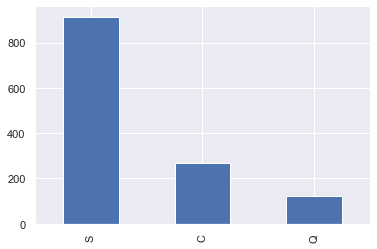

In [9]:
data['Embarked'].value_counts()

In [14]:
data[data['Fare'] == data['Fare'].max()]

,Unnamed: 0,Cabin,Embarked,Fare,Pclass,Ticket,Age,Name,Parch,Sex,SibSp,Survived
258,258,NaN,C,512.3292,1,PC 17755,35.0,"Ward, Miss. Anna",0,female,0,1.0
679,679,B51 B53 B55,C,512.3292,1,PC 17755,36.0,"Cardeza, Mr. Thomas Drake Martinez",1,male,0,1.0
737,737,B101,C,512.3292,1,PC 17755,35.0,"Lesurer, Mr. Gustave J",0,male,0,1.0
1234,1234,B51 B53 B55,C,512.3292,1,PC 17755,58.0,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,female,0,NaN


In [55]:
# get the survival rate of passenger that paid above average
data[data['Fare'] > data['Fare'].mean()]['Survived'].sum() / (data[data['Fare'] > data['Fare'].mean()]['Survived'].count())*100

31.97080291970803

In [56]:
data.isnull().sum() / len(data) *100

Unnamed: 0     0.000000
Cabin         77.463713
Embarked       0.152788
Fare           0.076394
Pclass         0.000000
Ticket         0.000000
Age           20.091673
Name           0.000000
Parch          0.000000
Sex            0.000000
SibSp          0.000000
Survived      31.932773
dtype: float64

In [ ]:
# 1. get all entries where fare is greater than average
# 2. get number of people that survived
# 3. 2 /1

In [46]:
def compute_survival_rate(column_name):
    unique_value = data[column_name].unique()
    

24.236252545824847

In [54]:
data[data['Pclass'] == 3]['Survived'].sum()

119.0

In [83]:
data[data['Pclass'] == 3]['Survived'].sum() / data['Survived'].count()*100

13.35578002244669

In [67]:
data[data['Pclass'] == 1]['Survived'].sum()

136.0

In [79]:
data[data['Pclass']==1]['Survived'].count()

216

In [80]:
136/216

0.6296296296296297

In [77]:
119/491

0.24236252545824846

In [73]:
87/184 

0.47282608695652173

In [65]:
data['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [66]:
data['Pclass'].isnull().sum()

0

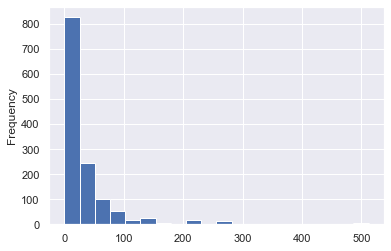

In [10]:
data['Fare'].plot(kind='hist', bins=20)

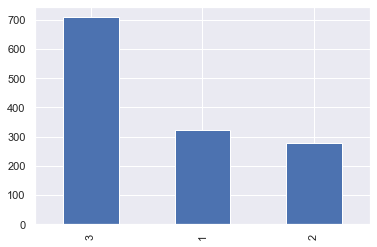

In [11]:
data['Pclass'].value_counts().plot(kind='bar')

In [12]:
cols_to_drop = ['Unnamed: 0', 'Ticket', 'Cabin', 'Name']

In [77]:
data['Cabin'].value_counts()

KeyError: 'Cabin'

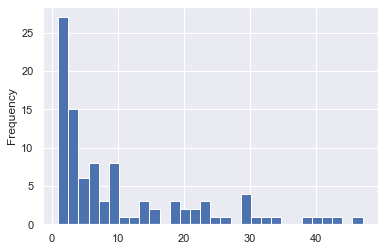

In [13]:
data['Age'].value_counts().plot(kind='hist', bins=30)

In [14]:
# parch, sex, sibsp
data['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

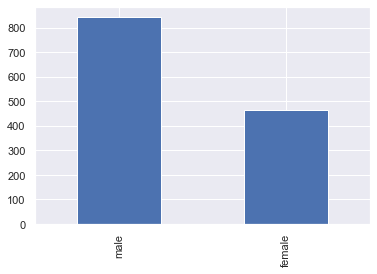

In [15]:
data['Sex'].value_counts().plot(kind='bar')

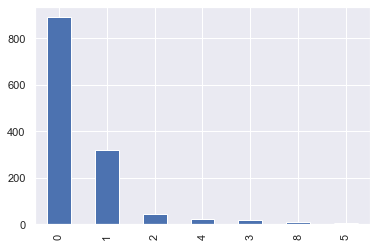

In [16]:
data['SibSp'].value_counts().plot(kind='bar')


In [17]:
np.corrcoef(data['Parch'], data['SibSp'])[0][1]

0.37358719062649315

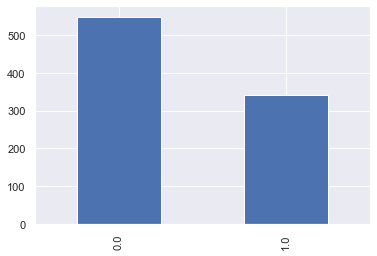

In [18]:
data['Survived'].value_counts().plot(kind='bar')

### Bivariate Analysis

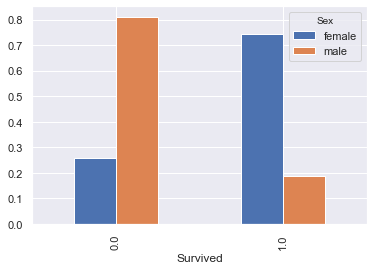

In [19]:
gender = pd.crosstab(data['Survived'], data['Sex'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)

In [20]:
d = pd.DataFrame()
help(d.div)

Help on method truediv in module pandas.core.ops:

truediv(other, axis='columns', level=None, fill_value=None) method of pandas.core.frame.DataFrame instance
    Get Floating division of dataframe and other, element-wise (binary operator `truediv`).
    
    Equivalent to ``dataframe / other``, but with support to substitute a fill_value
    for missing data in one of the inputs. With reverse version, `rtruediv`.
    
    Among flexible wrappers (`add`, `sub`, `mul`, `div`, `mod`, `pow`) to
    arithmetic operators: `+`, `-`, `*`, `/`, `//`, `%`, `**`.
    
    Parameters
    ----------
    other : scalar, sequence, Series, or DataFrame
        Any single or multiple element data structure, or list-like object.
    axis : {0 or 'index', 1 or 'columns'}
        Whether to compare by the index (0 or 'index') or columns
        (1 or 'columns'). For Series input, axis to match Series index on.
    level : int or label
        Broadcast across a level, matching Index values on the
        

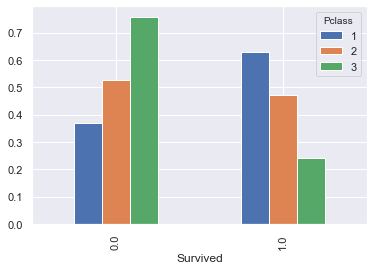

In [21]:
socio_class = pd.crosstab(data['Survived'], data['Pclass'])
socio_class
socio_class.div(socio_class.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)

In [22]:
socio_class

Pclass,1,2,3
Survived,,,
0.0,80,97,372
1.0,136,87,119


<AxesSubplot:xlabel='Survived'>

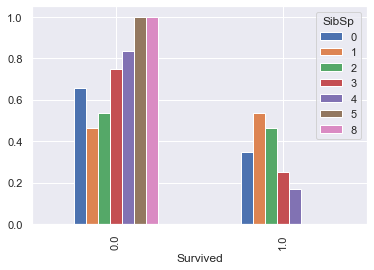

In [12]:
sib_sp = pd.crosstab(data['Survived'], data['SibSp'])

sib_sp.div(sib_sp.sum().astype(float), axis=1).plot(kind='bar', stacked=False)

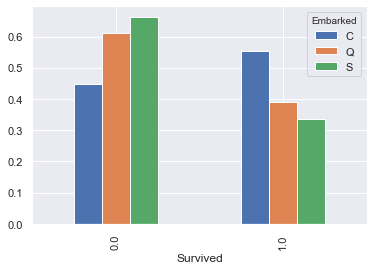

In [23]:
embarked_location = pd.crosstab(data['Survived'], data['Embarked'])

embarked_location.div(embarked_location.sum().astype(float), axis=1).plot(kind='bar', stacked=False)

### ${\textbf{Data Quality}}$

In [24]:
# Check Redundancy
data[ data['Name'] =='Connolly, Miss. Kate']

,Unnamed: 0,Cabin,Embarked,Fare,Pclass,Ticket,Age,Name,Parch,Sex,SibSp,Survived
289,289,NaN,Q,7.7500,3,370373,22.0,"Connolly, Miss. Kate",0,female,0,1.0
897,897,NaN,Q,7.6292,3,330972,30.0,"Connolly, Miss. Kate",0,female,0,NaN


In [25]:
print(data.shape)
data.drop(columns=cols_to_drop, axis=1, inplace=True)
print(data.shape)

(1309, 12)
(1309, 8)


In [26]:
# Fix Missing Values
data.isna().sum()

Embarked      2
Fare          1
Pclass        0
Age         263
Parch         0
Sex           0
SibSp         0
Survived    418
dtype: int64

In [27]:
# data['Age'] = data['Age'].notnull().astype(int)

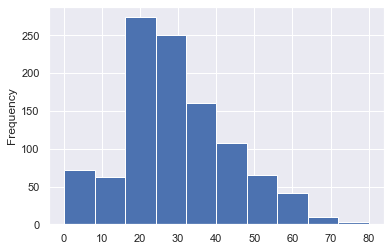

In [28]:
# Fix Missing in Age
data['Age'].plot(kind='hist')

In [29]:
fixed_missing_df = data.copy()

In [30]:
df = fixed_missing_df.copy()
 

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].median())


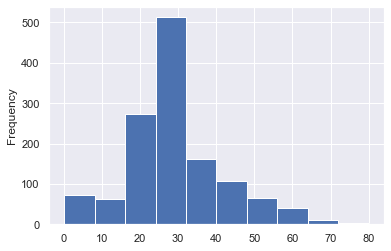

In [32]:
df['Age'].plot(kind='hist')

In [33]:
average_age = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
average_age

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    25.962264
1305    39.000000
1306    38.500000
1307    25.962264
1308    25.962264
Name: Age, Length: 1309, dtype: float64

In [34]:
fixed_missing_df.loc[:, 'Age'] = average_age

In [35]:
fixed_missing_df['Age'].isna().sum()

0

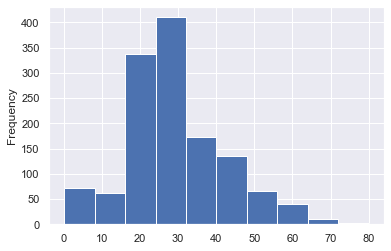

In [36]:
fixed_missing_df['Age'].plot(kind='hist')

In [37]:
print(fixed_missing_df.shape)
fixed_missing_df = fixed_missing_df[fixed_missing_df['Embarked'].notnull()]
print(fixed_missing_df.shape)
fixed_missing_df = fixed_missing_df[fixed_missing_df['Fare'].notnull()]
print(fixed_missing_df.shape)

(1309, 8)
(1307, 8)
(1306, 8)


## End of EDA

In [38]:
fixed_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Embarked  1306 non-null   object 
 1   Fare      1306 non-null   float64
 2   Pclass    1306 non-null   int64  
 3   Age       1306 non-null   float64
 4   Parch     1306 non-null   int64  
 5   Sex       1306 non-null   object 
 6   SibSp     1306 non-null   int64  
 7   Survived  889 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 91.8+ KB


### Converting Object Data Types to Int with the help of SKlearn (SCiKit Learn)

In [39]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
print(fixed_missing_df['Sex'].head(2))
fixed_missing_df['Sex'] = lb.fit_transform(fixed_missing_df['Sex'])
print(fixed_missing_df['Sex'].head(2))

# fixed_missing_df = pd.get_dummies(data=fixed_missing_df, columns=['Sex', 'Embarked'])
# fixed_missing_df.head()

0      male
1    female
Name: Sex, dtype: object
0    1
1    0
Name: Sex, dtype: int32


In [40]:
label_binarizer = preprocessing.LabelBinarizer()
print(fixed_missing_df['Embarked'].head(2))
fixed_missing_df['Embarked'] = label_binarizer.fit_transform(fixed_missing_df['Embarked'])
print(fixed_missing_df['Embarked'].head(2))

0    S
1    C
Name: Embarked, dtype: object
0    0
1    1
Name: Embarked, dtype: int32


### Feature Engineering

In [41]:
fixed_missing_df['old_young'] = df['Age'].map(lambda x: 1 if x > 35 else 0)
fixed_missing_df['marital_status'] = df['SibSp'].apply(lambda x: 1 if x > 1 else 0)

In [42]:
fixed_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Embarked        1306 non-null   int32  
 1   Fare            1306 non-null   float64
 2   Pclass          1306 non-null   int64  
 3   Age             1306 non-null   float64
 4   Parch           1306 non-null   int64  
 5   Sex             1306 non-null   int32  
 6   SibSp           1306 non-null   int64  
 7   Survived        889 non-null    float64
 8   old_young       1306 non-null   int64  
 9   marital_status  1306 non-null   int64  
dtypes: float64(3), int32(2), int64(5)
memory usage: 102.0 KB


In [43]:
len(fixed_missing_df[fixed_missing_df['Survived'].isnull()])

417

### Getting The Training and the Future(Test) Data

In [44]:
train_data = fixed_missing_df[fixed_missing_df['Survived'].notnull()]
test_data = fixed_missing_df[fixed_missing_df['Survived'].isnull()]
print(len(train_data))
print(len(test_data))

889
417


In [45]:
test_data.head(2)

,Embarked,Fare,Pclass,Age,Parch,Sex,SibSp,Survived,old_young,marital_status
891,0,7.8292,3,34.5,0,1,0,NaN,0,0
892,0,7.0000,3,47.0,0,0,1,NaN,1,0


In [67]:
train_data.head(2)

,Embarked,Fare,Pclass,Age,Parch,Sex,SibSp,Survived,old_young,marital_status
0,0,7.2500,3,22.0,0,1,1,0.0,0,0
1,1,71.2833,1,38.0,0,0,1,1.0,1,0


In [46]:
features = train_data.drop(columns=['Survived'], axis=1)
target = train_data['Survived']

In [47]:
features.head(2)

,Embarked,Fare,Pclass,Age,Parch,Sex,SibSp,old_young,marital_status
0,0,7.2500,3,22.0,0,1,1,0,0
1,1,71.2833,1,38.0,0,0,1,1,0


In [48]:
target = target.astype('int')
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int32

### Explaining Variable Unpacking

In [49]:
a,b,c = [4,5,2]
print(a)
print(b)
print(c)

4
5
2


### Splitting 
This is to enables us evaluate our Model when we built it

In [50]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target,
                                                                          test_size=0.2, random_state=2020)

print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(711, 9)
(178, 9)
(711,)
(178,)


In [72]:
feature_train.head(2)

,Embarked,Fare,Pclass,Age,Parch,Sex,SibSp,old_young,marital_status
11,0,26.55,1,58.0,0,0,0,1,0
132,0,14.50,3,47.0,0,0,1,1,0


In [73]:
target_train.head(2)

11     1
132    0
Name: Survived, dtype: int32

In [51]:
feature_train['Parch']

11     0
132    0
71     2
780    0
509    0
      ..
708    0
631    0
324    2
393    0
866    0
Name: Parch, Length: 711, dtype: int64

### Scaling 
To Avoid Biasness and improper weights 

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scale = StandardScaler()
feature_train_scaled = scale.fit_transform(feature_train)
feature_test_scaled = scale.transform(feature_test)

feature_train_scaled[:3]

array([[-0.47969137, -0.10974809, -1.55828169,  2.18213175, -0.48645063,
        -1.39212662, -0.47434805,  1.78391506, -0.3063432 ],
       [-0.47969137, -0.36414907,  0.83726054,  1.3490437 , -0.48645063,
        -1.39212662,  0.40165575,  1.78391506, -0.3063432 ],
       [-0.47969137,  0.31988345,  0.83726054, -0.9987499 ,  1.87441215,
        -1.39212662,  3.90567095, -0.56056481,  3.26431275]])

In [71]:
feature_train.iloc[:3]

,Embarked,Fare,Pclass,Age,Parch,Sex,SibSp,old_young,marital_status
11,0,26.55,1,58.0,0,0,0,1,0
132,0,14.50,3,47.0,0,0,1,1,0
71,0,46.90,3,16.0,2,0,5,0,1


### Model Building

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(feature_train_scaled, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
from sklearn.metrics import accuracy_score
target_predicition = lr.predict(feature_test_scaled)

# Evaluation

# accuracy_score(actual_prediction, model_prediction)


print("The Accuracy for our Trained Model is: {}".format(accuracy_score(target_test,
                                                                        target_predicition)))

The Accuracy for our Trained Model is: 0.797752808988764


In [55]:
target_test[:2]


886    0
200    0
Name: Survived, dtype: int32

In [56]:
target_predicition[:2]

array([0, 0])

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
grb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.3, max_depth=3)
grb.fit(feature_train_scaled, target_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [58]:
target_predicition = grb.predict(feature_test_scaled)

# Evaluation
print("The Accuracy for our Trained Model is: {}%".format(round(accuracy_score(target_test,
                                                                        target_predicition),4)*100))

The Accuracy for our Trained Model is: 82.58%


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=9)
rf.fit(feature_train_scaled, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
target_predicition = rf.predict(feature_test_scaled)

# Evaluation
print("The Accuracy for our Trained Model is: {}%".format(round(accuracy_score(target_test,
                                                                        target_predicition),4)*100))

The Accuracy for our Trained Model is: 82.02000000000001%


In [61]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf, features, target, scoring='accuracy', cv=7).mean()

In [62]:
score

0.8391451068616425

In [63]:
from catboost import CatBoostClassifier, Pool
eval_dataset = [(feature_train_scaled, target_train), (feature_test_scaled, target_test)]
cat = CatBoostClassifier(learning_rate=0.4, eval_metric='Accuracy',
                         early_stopping_rounds=100, verbose=100, iterations=3000)
cat.fit(feature_train_scaled, target_train, eval_set=eval_dataset)
cat_pred = cat.predict(feature_test_scaled)
accuracy_score(target_test, cat_pred)

0:	learn: 0.8241913	test: 0.8241913	test1: 0.7921348	best: 0.7921348 (0)	total: 89.8ms	remaining: 4m 29s
100:	learn: 0.9831224	test: 0.9831224	test1: 0.8202247	best: 0.8314607 (33)	total: 1.2s	remaining: 34.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8314606742
bestIteration = 33

Shrink model to first 34 iterations.


0.8314606741573034

In [64]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(feature_train_scaled, target_train)
cat_pred = xgb.predict(feature_test_scaled)
accuracy_score(target_test, cat_pred)

0.8146067415730337

# Predict for the Test Data

In [65]:
# Drop the Survived Column
test_df = test_data.drop(columns=['Survived'], axis=1)

# Scale it
test_df_scaled = scale.transform(test_df)

# Make Prediction
prediction = rf.predict(test_df_scaled)
print('Done......')

Done......


In [66]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [79]:
from dejavu.database import get_database, Database
import dejavu.decoder as decoder
from dejavu.fingerprint import fingerprint
import multiprocessing
import os
import traceback
import sys

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("%s already fingerprinted, continuing..." % filename)? (__init__.py, line 61)